In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,datasets

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
(x_train,x_test)=(x_train/255,x_test/255)

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(28,(3,3),activation='relu',input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
n=model.fit(x_train,y_train,validation_split=0.1,epochs=10 )

Epoch 1/10
1407/1407 [==============================] - 100s 69ms/step - loss: 1.4096 - accuracy: 0.4898 - val_loss: 1.1609 - val_accuracy: 0.5824
Epoch 2/10
1407/1407 [==============================] - 99s 70ms/step - loss: 1.0249 - accuracy: 0.6386 - val_loss: 0.9895 - val_accuracy: 0.6500
Epoch 3/10
1407/1407 [==============================] - 96s 68ms/step - loss: 0.8180 - accuracy: 0.7145 - val_loss: 1.0049 - val_accuracy: 0.6490
Epoch 4/10
1407/1407 [==============================] - 96s 68ms/step - loss: 0.6281 - accuracy: 0.7801 - val_loss: 0.9512 - val_accuracy: 0.6936
Epoch 5/10
1407/1407 [==============================] - 95s 68ms/step - loss: 0.4499 - accuracy: 0.8423 - val_loss: 1.0957 - val_accuracy: 0.6788
Epoch 6/10
1407/1407 [==============================] - 96s 68ms/step - loss: 0.3081 - accuracy: 0.8925 - val_loss: 1.2241 - val_accuracy: 0.6818
Epoch 7/10
1407/1407 [==============================] - 97s 69ms/step - loss: 0.2220 - accuracy: 0.9235 - val_loss: 1.3529 

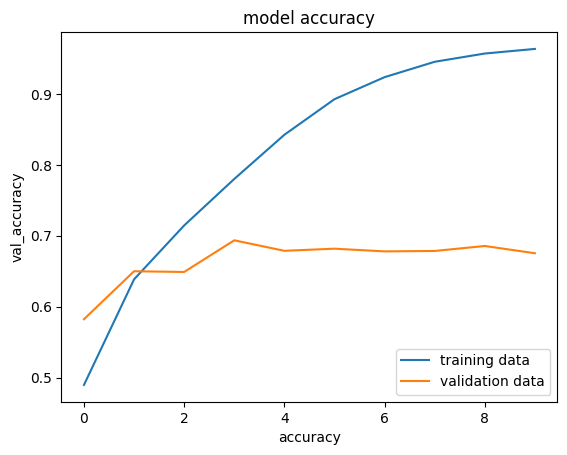

In [ ]:
#model_accuracy
import matplotlib.pyplot as plt
plt.plot(n.history['accuracy'])
plt.plot(n.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend(['training data','validation data'],loc='lower right')
plt.show()

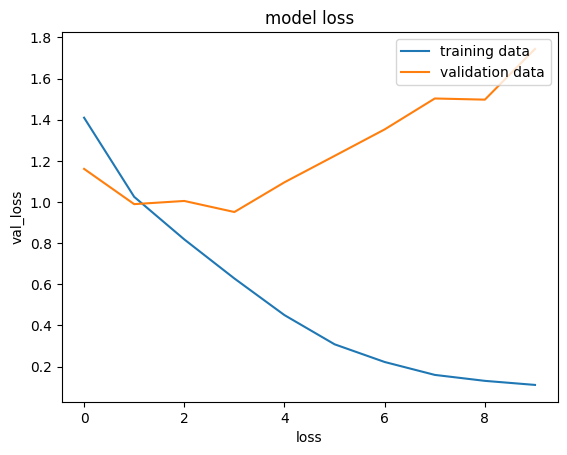

In [ ]:
plt.plot(n.history['loss'])
plt.plot(n.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend(['training data','validation data'],loc='upper right')
plt.show()

In [ ]:
y_pred=model.predict(x_test)
y_pred

313/313 [==============================] - 6s 18ms/step


array([[ -7.1545696 ,  -3.8894713 ,  -2.638161  , ...,  -4.9697156 ,
         -2.9192927 ,  -5.6747003 ],
       [ -2.4652967 ,   6.62028   ,  -2.4698489 , ...,  -7.7491617 ,
          7.7294936 ,   0.5808102 ],
       [  2.0990658 ,   0.4607647 ,  -0.8762349 , ...,  -2.5584648 ,
          0.8233524 ,  -0.40964916],
       ...,
       [-13.459937  , -11.298323  ,   0.5059294 , ...,   1.917841  ,
         -7.1906595 , -10.751806  ],
       [ -7.3737874 ,  -7.55632   ,  -4.6447444 , ...,  -3.9705079 ,
        -10.790733  , -10.669506  ],
       [ -5.444022  ,   2.0382254 ,  -2.9725602 , ...,   6.713223  ,
         -9.116141  ,  -3.300453  ]], dtype=float32)

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([3, 8, 0, ..., 5, 4, 7])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6576